In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd

import pandas_datareader.data as pdr
import datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
import matplotlib.pyplot as plt

In [24]:
start = (2011, 8, 25)
start = datetime.datetime(*start)
end = datetime.date.today()

In [25]:
samsungelc_df = pdr.DataReader('005930.KS', 'yahoo', start, end)
sk_df = pdr.DataReader('000660.KS', 'yahoo', start, end)
naver_df = pdr.DataReader('035420.KS', 'yahoo', start, end)
kakao_df = pdr.DataReader('035720.KS', 'yahoo', start, end)
samsungbio_df = pdr.DataReader('207940.KS', 'yahoo', start, end)

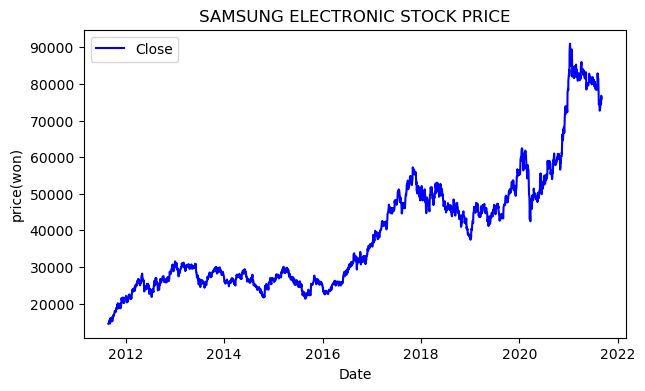

In [26]:
## 삼성전자
plt.figure(figsize=(7,4))
plt.title('SAMSUNG ELECTRONIC STOCK PRICE')
plt.xlabel('Date')
plt.ylabel('price(won)')

plt.plot(samsungelc_df['Close'], label='Close', color='b')
plt.legend(loc='best')
plt.show()

In [79]:
### 데이터 전처리
samsungelc_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2461.000000,2461.000000,2461.000000,2461.000000,2.461000e+03,2461.000000
mean,39476.716782,38702.945957,39089.146688,39088.078017,1.425089e+07,35226.435612
std,16800.994305,16495.558069,16643.635801,16629.754446,7.440438e+06,17423.536545
min,14680.000000,14200.000000,14340.000000,14500.000000,0.000000e+00,11862.802734
25%,26240.000000,25760.000000,26000.000000,26000.000000,9.550500e+06,21824.019531
50%,31500.000000,30880.000000,31180.000000,31160.000000,1.237930e+07,26857.355469
75%,49200.000000,48040.000000,48700.000000,48700.000000,1.661460e+07,44119.546875
max,96800.000000,89500.000000,90300.000000,91000.000000,9.030618e+07,90198.078125


In [209]:
samsungelc_df.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-08-25,14760.0,14420.0,14740.0,14500.0,19039800.0,11862.802734
1,2011-08-26,14680.0,14340.0,14340.0,14520.0,10612300.0,11879.163086
2,2011-08-29,14840.0,14480.0,14840.0,14660.0,13001850.0,11993.701172
3,2011-08-30,14960.0,14720.0,14820.0,14840.0,12629600.0,12140.965820
4,2011-08-31,14940.0,14620.0,14940.0,14880.0,14495500.0,12173.689453
...,...,...,...,...,...,...,...
2449,2021-08-23,74000.0,73000.0,73300.0,73300.0,19384648.0,73300.000000
2450,2021-08-24,75700.0,73900.0,73900.0,75600.0,21016913.0,75600.000000
2451,2021-08-25,76600.0,74900.0,76200.0,75700.0,22319664.0,75700.000000
2452,2021-08-26,76200.0,74600.0,76100.0,74600.0,16671494.0,74600.000000


In [27]:
def make_stock(df):
    ## data preprocessing
    df = df.reset_index().replace(0, np.NaN).dropna().iloc[:, 1:]
    scaler = MinMaxScaler()
    scaler_df = scaler.fit_transform(df.iloc[:, :-1])
    scaler_df = pd.DataFrame(scaler_df, columns = df.iloc[:,:-1].columns)
    y_df = pd.DataFrame(scaler_df.Close, columns = ['Close']).to_numpy()
    X_df = pd.DataFrame(scaler_df.loc[:, ['High','Low','Open', 'Volume']], columns = ['High','Low','Open', 'Volume']).to_numpy()
    ## train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, shuffle=False)
    def make_dataset(feature, label, window_size):
        feature_list = []
        label_list = []
        for i in range(len(feature)-window_size):
            feature_list.append(feature[i:i+window_size])
            label_list.append(label[i:i+window_size])
        return np.array(feature_list), np.array(label_list)
    window_size = 50
    X_train2, y_train2 = make_dataset(X_train, y_train, window_size)
    X_test2, y_test2 = make_dataset(X_test, y_test, window_size)
    return X_train2, X_test2, y_train2, y_test2

In [96]:
X_train2, X_test2, y_train2, y_test2 = make_stock(samsungbio_df)

In [80]:
# ### 데이터 전처리2
# samsungelc_df = samsungelc_df.replace(0, np.NaN)
# samsungelc_df = samsungelc_df.dropna()
# samsungelc_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
### 데이터 정규화
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(samsungelc_df.iloc[:, :-1])

In [13]:
samsungelc_df.iloc[:, :-1]

,High,Low,Open,Close,Volume
Date,,,,,
2011-08-25,14760.0,14420.0,14740.0,14500.0,19039800.0
2011-08-26,14680.0,14340.0,14340.0,14520.0,10612300.0
2011-08-29,14840.0,14480.0,14840.0,14660.0,13001850.0
2011-08-30,14960.0,14720.0,14820.0,14840.0,12629600.0
2011-08-31,14940.0,14620.0,14940.0,14880.0,14495500.0
...,...,...,...,...,...
2021-08-27,75000.0,73800.0,74300.0,74300.0,15172748.0
2021-08-30,75500.0,74200.0,75400.0,74600.0,12686999.0
2021-08-31,76700.0,74300.0,74900.0,76700.0,24630370.0


In [20]:
scaler_df = pd.DataFrame(scaler_df, columns = samsungelc_df.iloc[:,:-1].columns, index=samsungelc_df.index[:])

In [21]:
scaler_df.head(

,High,Low,Open,Close,Volume
Date,,,,,
2011-08-25,0.000974,0.002922,0.005266,0.000000,0.180911
2011-08-26,0.000000,0.001859,0.000000,0.000261,0.084051
2011-08-29,0.001948,0.003718,0.006582,0.002092,0.111515
2011-08-30,0.003410,0.006906,0.006319,0.004444,0.107237
2011-08-31,0.003166,0.005578,0.007899,0.004967,0.128682
...,...,...,...,...,...
2021-08-27,0.734535,0.791501,0.789363,0.781699,0.136466
2021-08-30,0.740623,0.796813,0.803844,0.785621,0.107897
2021-08-31,0.755236,0.798141,0.797262,0.813072,0.245166


In [83]:
# y_df = pd.DataFrame(scaler_df.Close, columns = ['Close']).to_numpy()
# X_df = pd.DataFrame(scaler_df.loc[:, ['High','Low','Open', 'Volume']], columns = ['High','Low','Open', 'Volume']).to_numpy()

In [84]:
# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, shuffle=False)

In [85]:
# ## window
# def make_dataset(feature, label, window_size):
#     feature_list = []
#     label_list = []
#     for i in range(len(feature)-window_size):
#         feature_list.append(feature[i:i+window_size])
#         label_list.append(label[i:i+window_size])
#     return np.array(feature_list), np.array(label_list)

In [86]:
# window_size = 50
# X_train2, y_train2 = make_dataset(X_train, y_train, window_size)
# X_test2, y_test2 = make_dataset(X_test, y_test, window_size)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-08-25,14760.0,14420.0,14740.0,14500.0,19039800.0,11862.802734
2011-08-26,14680.0,14340.0,14340.0,14520.0,10612300.0,11879.163086
2011-08-29,14840.0,14480.0,14840.0,14660.0,13001850.0,11993.701172
2011-08-30,14960.0,14720.0,14820.0,14840.0,12629600.0,12140.965820
2011-08-31,14940.0,14620.0,14940.0,14880.0,14495500.0,12173.689453
...,...,...,...,...,...,...
2021-08-23,74000.0,73000.0,73300.0,73300.0,19384648.0,73300.000000
2021-08-24,75700.0,73900.0,73900.0,75600.0,21016913.0,75600.000000
2021-08-25,76600.0,74900.0,76200.0,75700.0,22319664.0,75700.000000


In [105]:
model = Sequential()
#model.add(Embedding(input_dim = X.shape[0]+1, output_dim=4, input_length=50))
model.add(LSTM(512,input_shape=X_train2.shape[1:],activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(512, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(512, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_75 (LSTM)               (None, 50, 512)           1058816   
_________________________________________________________________
dropout_75 (Dropout)         (None, 50, 512)           0         
_________________________________________________________________
lstm_76 (LSTM)               (None, 50, 512)           2099200   
_________________________________________________________________
dropout_76 (Dropout)         (None, 50, 512)           0         
_________________________________________________________________
lstm_77 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dropout_77 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

In [106]:
model.fit(X_train2, y_train2,
          validation_data = (X_test2, y_test2),
          batch_size=10,
          epochs=20)

Epoch 1/20
88/88 [==============================] - 103s 1s/step - loss: 0.0125 - val_loss: 0.0029
Epoch 2/20
88/88 [==============================] - 117s 1s/step - loss: 0.0035 - val_loss: 0.0038
Epoch 3/20
88/88 [==============================] - 112s 1s/step - loss: 0.0034 - val_loss: 0.0076
Epoch 4/20
88/88 [==============================] - 109s 1s/step - loss: 0.0031 - val_loss: 0.0065
Epoch 5/20
88/88 [==============================] - 120s 1s/step - loss: 0.0030 - val_loss: 0.0034
Epoch 6/20
88/88 [==============================] - 114s 1s/step - loss: 0.0029 - val_loss: 0.0135
Epoch 7/20
88/88 [==============================] - 108s 1s/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/20
88/88 [==============================] - 105s 1s/step - loss: 0.0033 - val_loss: 0.0027
Epoch 9/20
88/88 [==============================] - 118s 1s/step - loss: 0.0037 - val_loss: 0.0088
Epoch 10/20
88/88 [==============================] - 112s 1s/step - loss: 0.0034 - val_loss: 0.0039
Epoch 11/

In [107]:
real_l = []
for i in range(y_test2.shape[0]):
    real_l.append(np.mean(y_test2[i]))

real = pd.DataFrame(real_l)
pred = model.predict(X_test2)

In [43]:
tommorow_pred = model.predict(X_test2[-1:])

In [45]:
tommorow_pred

array([[0.77956885]], dtype=float32)

In [36]:
pred[-1]

array([0.79498285], dtype=float32)

In [44]:
samsungelc_df.index[-250:]

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14',
               ...
               '2021-08-20', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31',
               '2021-09-01', '2021-09-02'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

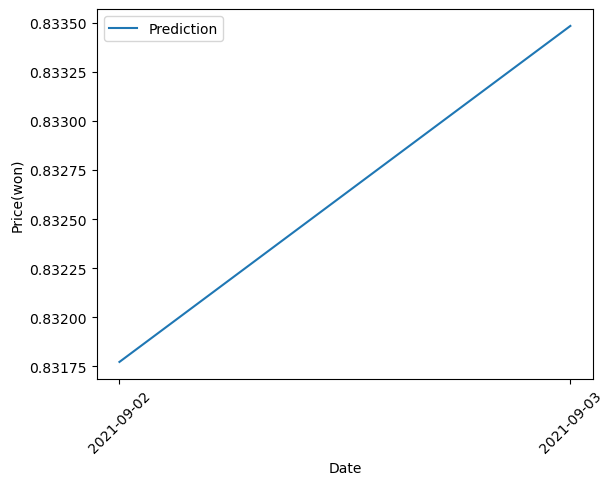

In [111]:
### 1년
plt.plot(['2021-09-02', '2021-09-03'], pred[-2:], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price(won)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

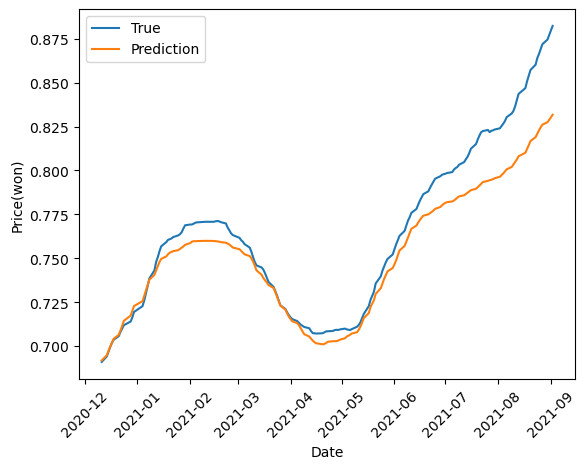

In [110]:
### 1년
plt.plot(samsungbio_df.index[-181:], real[-181:].values, label='True')
plt.plot(samsungbio_df.index[-181:], pred[-182:-1], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price(won)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

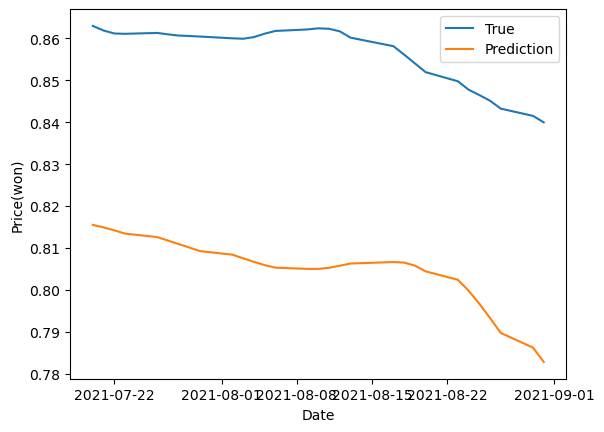

In [50]:
### 1달
plt.plot(samsungelc_df.index[-30:], real[-30:].values, label='True')
plt.plot(samsungelc_df.index[-30:], pred[-31:-1], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price(won)')
plt.legend()
plt.show()

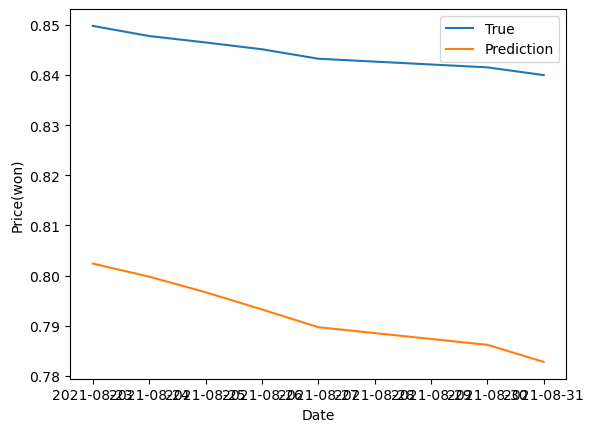

In [51]:
### 1주
plt.plot(samsungelc_df.index[-7:], real[-7:].values, label='True')
plt.plot(samsungelc_df.index[-7:], pred[-8:-1], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price(won)')
plt.legend()
plt.show()

In [132]:
model.save('stock_model.h5')

In [134]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D56A-9C98

 C:\Users\doyoung_2 디렉터리

2021-08-27  오후 01:49    <DIR>          .
2021-08-27  오후 01:49    <DIR>          ..
2021-08-25  오후 08:13    <DIR>          .atom
2021-08-10  오전 09:18    <DIR>          .conda
2021-08-26  오전 02:53    <DIR>          .config
2021-08-25  오후 09:19               309 .gitconfig
2021-08-27  오전 11:37    <DIR>          .ipynb_checkpoints
2021-07-17  오전 09:26    <DIR>          .ipython
2021-08-10  오전 09:33    <DIR>          .jupyter
2021-08-10  오전 09:39    <DIR>          .keras
2021-08-01  오후 05:19    <DIR>          .matplotlib
2021-07-17  오후 01:34    <DIR>          .postman
2021-08-22  오후 07:54    <DIR>          .VirtualBox
2021-08-25  오전 09:34    <DIR>          .vscode
2021-08-01  오후 01:15    <DIR>          21_1_pbl
2021-07-14  오후 09:07    <DIR>          3D Objects
2021-08-03  오후 09:57    <DIR>          anaconda3
2021-07-15  오전 10:55       570,853,747 Anaconda3-2021.05-Linux-x86_64.sh
2021-07-14  오후 09:07    <DIR>          C

In [135]:
from keras.models import load_model
stock = load_model('stock_model.h5')

In [136]:
stock.predict(X_test2)

array([[0.45648035],
       [0.4586919 ],
       [0.4609389 ],
       [0.46308538],
       [0.46515572],
       [0.46669567],
       [0.46764293],
       [0.46877882],
       [0.47031212],
       [0.47122625],
       [0.4720904 ],
       [0.4727762 ],
       [0.47361124],
       [0.47395155],
       [0.47402355],
       [0.47417843],
       [0.4745889 ],
       [0.4751621 ],
       [0.4758313 ],
       [0.4769018 ],
       [0.47877535],
       [0.48057315],
       [0.4823538 ],
       [0.48468187],
       [0.4869341 ],
       [0.489131  ],
       [0.49100944],
       [0.4925532 ],
       [0.4938813 ],
       [0.49496284],
       [0.49631283],
       [0.4976871 ],
       [0.49909922],
       [0.5005108 ],
       [0.50151944],
       [0.50261027],
       [0.50414073],
       [0.5060054 ],
       [0.50785446],
       [0.50967133],
       [0.51177067],
       [0.5134726 ],
       [0.51504934],
       [0.5169785 ],
       [0.5189372 ],
       [0.5208175 ],
       [0.5225964 ],
       [0.524